# Trabajo de Grupo - Random Forest


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
#load dataset.
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')
#df.head()

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

ID                             ID
X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_1
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: 0, dtype: object


In [3]:
# Mostrar los datos despues de votar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a numerico.

In [4]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [5]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [6]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [7]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)


## Corregir por desbalancia  
Nuevos dataframes con nombres X_entren_os, y_entren_os  

In [8]:
# Corregir desbalancia.
# Crear nuevo entren dataframe
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('neuvo balance=\n', y_entren_os.value_counts())


balance=
 0    18641
1     5359
Name: Y, dtype: int64 
num muestras= 13282
neuvo balance=
 1    18641
0    18641
Name: Y, dtype: int64


## Función para tomar sqrt de montos  
Montos de dinero tienen mucho obliquidad en sus distribuciones. Entonces, hay que corregir este para mejor oportunidad en entrenamiento.  

El dataframe X_entren_os_tr tiene los mismos datos como X_entren_os pero con montos transformados.

Tambien, el datafram X_val_tr tiene los mismos datos como X_val pero con montos transformados.  

In [9]:
# Compensar por oblicuidad de la distribucion del dinero.
# Función para aplicar a cualquier X (entran, val, test, entran_os)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        #print(x)
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
#print(X_entren_os_tr.describe())
sqrt_monto(X_entren_os_tr)
#print(X_entren_os_tr.describe())
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)

# Preparar X_test_tr tambien.
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

In [10]:
# Ver los variables despues de transformacion.
# X12 ... X23 están transformados.
X_entren_os_tr.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,...,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000
mean,154128.141194,1.588649,1.861434,1.542514,35.636634,0.237004,0.082238,0.029746,-0.041575,-0.102918,...,0.440689,0.422180,0.389228,0.361350,0.347158,0.411893,0.541411,0.392589,0.265633,0.332592
std,126221.942164,0.492085,0.764902,0.524937,9.472581,1.262366,1.341561,1.336956,1.330073,1.297534,...,0.409927,0.399954,0.378244,0.361613,0.358005,23.049306,34.658746,23.042095,1.055495,5.601149
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.020406,0.017957,0.015385,0.011581,0.008522,0.034286,0.031163,0.019886,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.371845,0.343615,0.306708,0.268410,0.237135,0.055004,0.054219,0.044505,0.040017,0.041263
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.847187,0.812880,0.727440,0.660288,0.634443,0.260129,0.243973,0.171602,0.148549,0.181343
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,5.456200,4.558050,4.645500,4.935500,2.694100,4444.333333,5001.000000,4444.333333,129.705128,690.655172


## Función para representar pagos como variables numericos y categoricales
Es un poco problematico en que no todos los algoritmos queren los variables.  
Tampoco, aun que algunos usarán los variables categoricales, no van a querer convertido a 'dummies'.  
Entonces, pongamos en otro dataframe y dejar a los funcciones a convertir a dummies.  
Los variables X6 ... X11 están 'dropped'.  

X_entren_os_tr_pago, X_val_tr_pago, X_test_tr_pago  


Para construir los dummies podemos usar:
```
X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)   
X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
```







In [11]:
# Construir varibles categorical y numerical por pagos.
cols_pago = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
cols_pago_cat = ['X6cat', 'X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
def cat_num_pago(X):
    for x in cols_pago:
        xcat = x+'cat'
        X[xcat] = X[x]
        X.loc[X[xcat]>0, xcat] = 1
        X[xcat] = X[xcat].astype('category')
        xnum = x+'num'
        X[xnum] = X[x]
        X.loc[X[xnum]<0, xnum] = 0
        
    
X_entren_os_tr_pago = X_entren_os_tr.copy()    
cat_num_pago(X_entren_os_tr_pago)
X_entren_os_tr_pago.drop(columns=cols_pago, inplace=True)

X_val_tr_pago = X_val_tr.copy()
cat_num_pago(X_val_tr_pago)
X_val_tr_pago.drop(columns=cols_pago, inplace=True)

# Preparar X_text_tr_pago tambien.
X_test_tr_pago = X_test_tr.copy()
cat_num_pago(X_test_tr_pago)
X_test_tr_pago.drop(columns=cols_pago, inplace=True)



#X_entren_os_tr = pd.get_dummies(X_entren_os_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_val_tr = pd.get_dummies(X_val_tr, prefix = cols_pago, columns=cols_pago_cat)
#X_test_tr = pd.get_dummies(X_test_tr, prefix = cols_pago, columns=cols_pago_cat)



In [12]:
X_entren_os_tr_pago.head()
#X_val_tr_pago.head()
#X_test_tr_pago.head()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,...,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
ID,,,,,,,,,,,,,,,,,,,,,
9333,420000,2,1,1,30,61.562976,138.895644,122.751782,193.481265,-43.543082,...,-1,0,-1,0,-1,0,-1,0,-1,0
12594,60000,2,3,2,47,26.381812,26.381812,26.381812,26.381812,26.381812,...,-1,0,-1,0,-1,0,-1,0,-1,0
1874,30000,2,2,2,22,165.402539,169.150820,170.830325,170.243943,114.455231,...,0,0,0,0,0,0,0,0,0,0
16157,20000,2,2,1,25,58.770741,82.915620,118.050837,53.065997,86.133617,...,-1,0,-1,0,-1,0,-1,0,-1,0
25510,60000,2,1,2,25,236.930370,239.332405,238.681797,242.270510,239.693554,...,0,0,0,0,0,0,0,0,0,0


## Función de costo adaptado

> El costo adaptado es nuestra medida principal de la calidad.  
Los medidas demas son solo para comparar con otros resultados.  

Con porciento de 'default' de 22.12%, si decimos que todos va a pagar su deuda, vamos a tener un exactitud de 87.88%, pero vamos a tener un costo adaptado de 0.594 por cliente.  Este es nuestra linea base para comparar nuestros resultados.



In [13]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)


## Mostrar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [14]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



## Capacitar entren+val para usar para entren y test  

In [15]:
## Hay que corregir por la desbalancia en entrenval tambien,
## para cuando estamos listo para el 'test'.
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: neuvo balance=\n', y_entrenval_os.value_counts())

# Preparar X_entrenval_os_tr tambien
# Pare cuando hacemos el test.
X_entrenval_os_tr = X_entrenval_os.copy()
sqrt_monto(X_entrenval_os_tr)

# Preparar X_entrenval_os_tr_pago tambien.
X_entrenval_os_tr_pago = X_entrenval_os_tr.copy()
cat_num_pago(X_entrenval_os_tr_pago)
X_entrenval_os_tr_pago.drop(columns=cols_pago, inplace=True)

entran+val: balance=
 0    20993
1     6007
Name: Y, dtype: int64 
num muestras= 14986
entren+val: neuvo balance=
 1    20993
0    20993
Name: Y, dtype: int64


# Random Forest
## Sin oversampling  
### peor que la linea base de costo=0.594  


Entrenamiento
Exactitud:     0.9934166666666666
Precisión:     0.9980846581114728
Exhaustividad: 0.9723829072588169
AUC:           0.9859232276758653
Costo por cliente: -0.185875

Validacion
Exactitud:     0.813
Precisión:     0.6141732283464567
Exhaustividad: 0.3611111111111111
AUC:           0.6493055555555556
Costo por cliente: 0.661



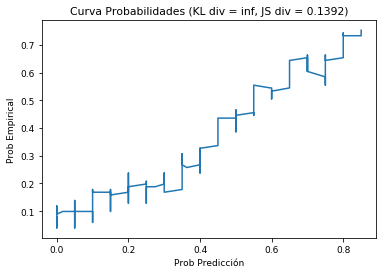

In [16]:
# Uso de random forest.
# Caso simple, ningun ajusto a los parametros por defecto.
from sklearn.ensemble import RandomForestClassifier

#utilizaremos X e Y de entrenamiento
mi_bosque = RandomForestClassifier(n_estimators=20)
mi_bosque.fit(X_entren, y_entren)

#función de costo
print('\nEntrenamiento')
custom_cost(mi_bosque, X_entren, y_entren)
print('\nValidacion')
custom_cost(mi_bosque, X_val, y_val)
print()
#mostrar probabilidades empiricales vs predicción
y_val_prob = mi_bosque.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)


Entrenamiento
Exactitud:     0.924
Precisión:     0.9727199786039048
Exhaustividad: 0.6786713939167756
AUC:           0.8365997922322466
Costo por cliente: 0.21145833333333333

Validacion
Exactitud:     0.8196666666666667
Precisión:     0.638961038961039
Exhaustividad: 0.37962962962962965
AUC:           0.6602654950869238
Costo por cliente: 0.6343333333333333



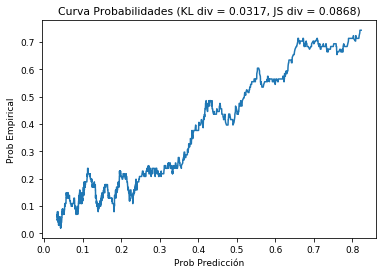

In [17]:
# Uso de parametro de min_impurity_decrease para prevenir training bias.
from sklearn.ensemble import RandomForestClassifier
#utilizaremos X e y de tren. 
#min_impurity_decrease=0.00005 para reducir bias.
bosque = RandomForestClassifier(n_estimators=20, min_impurity_decrease=0.00005)
bosque.fit(X_entren, y_entren)

#función de costo
print('\nEntrenamiento')
custom_cost(bosque, X_entren, y_entren)
print('\nValidacion')
custom_cost(bosque, X_val, y_val)
print()
#mostrar probabilidades empiricales vs predicción
y_val_prob = bosque.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

## Busqueda del Optimo en RandomForest

In [18]:
# Función para buscar el mejor costo de validacion.
import sys
from sklearn.ensemble import RandomForestClassifier

def imprimirCalidad(calidad):
    print('Exactitud:    ',  calidad.accuracy)
    print('Precisión:    ', calidad.precision)
    print('Exhaustividad:', calidad.recall)
    print('AUC:          ', calidad.AUC)
    print('Costo por cliente:', calidad.cost)


def buscarForest(X_entren, y_entren, X_val, y_val,
                 n_est_list=[20], min_imp_dec_list=[0], max_depth_list=[None], printdetail=False):
    
    _cost = sys.float_info.max
    
    hist = []
    
    for n_est in n_est_list:
        for min_imp in min_imp_dec_list:
            for max_depth in max_depth_list:
                bosque = RandomForestClassifier(
                    n_estimators=n_est, min_impurity_decrease=min_imp, max_depth=max_depth)
                bosque.fit(X_entren, y_entren)

                if printdetail:
                    print('\n* Parametros *')
                    print('num_estimators =', n_est)
                    print('min_impurity_decrease =', min_imp)
                    print('max_depth =', max_depth)
                    print('\nEntrenamiento')
                    entren_cost = custom_cost(bosque, X_entren, y_entren, True)
                    print('\nValidacion')
                    val_cost = custom_cost(bosque, X_val, y_val, True)
                    # Tambien save to list to print at finish.
                    hist.append([n_est, min_imp, max_depth, 
                        val_cost.accuracy, val_cost.precision, val_cost.recall, 
                        val_cost.AUC, val_cost.cost])
                else:
                    entren_cost = custom_cost(bosque, X_entren, y_entren, False)
                    val_cost = custom_cost(bosque, X_val, y_val, False)
                    
                if _cost > val_cost.cost:
                    _cost = val_cost.cost
                    _n_est = n_est
                    _min_imp = min_imp
                    _max_depth = max_depth
                    _entren_cost = entren_cost
                    _val_cost = val_cost
                    _bosque = bosque
               
    print('\n*** Summilla - Mejor Resultados ***')
    print('\nParametros:')
    print('num_estimators =', _n_est)
    print('min_impurity_decrease =', _min_imp)
    print('max_depth =', _max_depth)
    print('\nEntrenamiento')
    imprimirCalidad(_entren_cost)
    print('\nValidacion')
    imprimirCalidad(_val_cost)

    print('\nProbabilidad de no pagar')
    y_val_prob = _bosque.predict_proba(X_val)[:,1] # Using probability of category +1
    mostrarPQ(y_val, y_val_prob)
    return hist


* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 11

Entrenamiento
Exactitud:     0.8555833333333334
Precisión:     0.8315527065527065
Exhaustividad: 0.43825075075075076
AUC:           0.7064593513822305
Costo por cliente: 0.5459583333333333

Validacion
Exactitud:     0.8146666666666667
Precisión:     0.667574931880109
Exhaustividad: 0.36082474226804123
AUC:           0.6541305960370797
Costo por cliente: 0.6823333333333333

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 15

Entrenamiento
Exactitud:     0.8687083333333333
Precisión:     0.8567682726974762
Exhaustividad: 0.4906156156156156
AUC:           0.7336057940974393
Costo por cliente: 0.47470833333333334

Validacion
Exactitud:     0.8183333333333334
Precisión:     0.6717948717948717
Exhaustividad: 0.3858615611192931
AUC:           0.6653564591464626
Costo por cliente: 0.6503333333333333

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0005
max_depth = 11

E

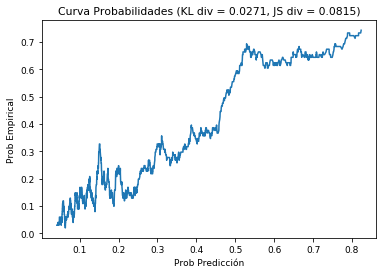

In [71]:
# Optimizar con datos originales. Podemos usar los otros datos tambien.
hist_simple = buscarForest(X_entren, y_entren, X_val, y_val, 
             n_est_list=[10, 50], 
             min_imp_dec_list=[0.0001, 0.0005], 
             max_depth_list=[11, 15], printdetail=True)


## Over Sampling  
### Mejoramiento dramatico!!  
### Mejor que la linea base de costo=0.5576  


Entrenamiento
Exactitud:     0.7396598894909071
Precisión:     0.8010241897446264
Exhaustividad: 0.6377340271444665
AUC:           0.739659889490907
Costo por cliente: 0.6660050426479266

Validacion
Exactitud:     0.7703333333333333
Precisión:     0.47515151515151516
Exhaustividad: 0.6049382716049383
AUC:           0.7104198160745779
Costo por cliente: 0.44033333333333335

Probabilidad de no pagar


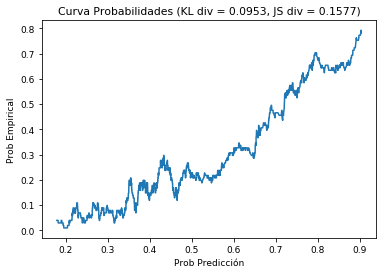

In [19]:
# probar data balanciado.
from sklearn.ensemble import RandomForestClassifier

#utilizaremos X e y de tren. 
bosque = RandomForestClassifier(n_estimators=50, min_impurity_decrease=0.0001, max_depth=7)
bosque.fit(X_entren_os, y_entren_os)

print('\nEntrenamiento')
custom_cost(bosque, X_entren_os, y_entren_os, True)
print('\nValidacion')
custom_cost(bosque, X_val, y_val, True)
print('\nProbabilidad de no pagar')
y_val_prob = bosque.predict_proba(X_val)[:,1] # Using probability of category +1
mostrarPQ(y_val, y_val_prob)


Entrenamiento
Exactitud:     0.7375140818625611
Precisión:     0.8034404770063738
Exhaustividad: 0.6288825706775387
AUC:           0.7375140818625611
Costo por cliente: 0.6902794914435921

Validacion
Exactitud:     0.7733333333333333
Precisión:     0.4800498753117207
Exhaustividad: 0.5941358024691358
AUC:           0.7084199420508944
Costo por cliente: 0.449

Probabilidad de no pagar


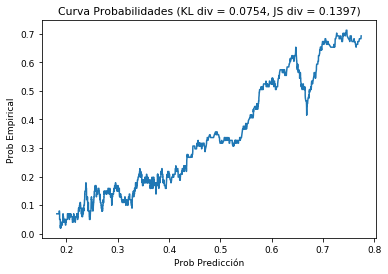

In [20]:
# probar data balanciado con transformación sqrt de montos.
from sklearn.ensemble import RandomForestClassifier

#utilizaremos X e y de tren. 
bosque = RandomForestClassifier(n_estimators=50, min_impurity_decrease=0.0001, max_depth=7)
bosque.fit(X_entren_os_tr, y_entren_os)

print('\nEntrenamiento')
custom_cost(bosque, X_entren_os_tr, y_entren_os, True)
print('\nValidacion')
custom_cost(bosque, X_val_tr, y_val, True)
print('\nProbabilidad de no pagar')
y_val_prob = bosque.predict_proba(X_val)[:,1] # Using probability of category +1
mostrarPQ(y_val, y_val_prob)

In [21]:
# Convertir los variables categoricals al numericos.
catlist = ['X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
for c in catlist:
    X_entren_os_tr_pago[c] = X_entren_os_tr_pago[c].astype('int64')
    X_val_tr_pago[c] = X_val_tr_pago[c].astype('int64')
    X_test_tr_pago[c] = X_test_tr_pago[c].astype('int64')

X_entren_os_tr_pago.describe()


,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,...,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
count,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,...,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.000000,37282.00000,37282.000000
mean,154128.141194,1.588649,1.861434,1.542514,35.636634,173.784134,170.020689,165.334834,157.972910,151.252322,...,-0.185478,0.497157,-0.219436,0.459471,-0.265731,0.401749,-0.302076,0.352985,-0.33893,0.343919
std,126221.942164,0.492085,0.764902,0.524937,9.472581,140.894369,139.589250,137.547090,133.076339,130.285846,...,0.918742,0.954115,0.918821,0.946112,0.907077,0.945309,0.897798,0.908913,0.91586,0.892438
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-406.915225,-264.153365,-396.565253,-412.310563,-285.191164,...,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,-2.00000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,58.772868,54.277067,50.946049,47.992187,41.337026,...,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,147.810688,144.984482,141.823834,138.434100,135.127717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,253.058785,248.193473,242.313330,229.082954,222.009009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,982.095209,991.932961,1289.995736,944.238317,962.897191,...,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.000000,8.000000,1.00000,8.000000



Entrenamiento
Exactitud:     0.7341344348479159
Precisión:     0.8001100185656329
Exhaustividad: 0.624215439085886
AUC:           0.7341344348479159
Costo por cliente: 0.7053269674373692

Validacion
Exactitud:     0.774
Precisión:     0.48148148148148145
Exhaustividad: 0.6018518518518519
AUC:           0.7116402116402116
Costo por cliente: 0.44

Probabilidad de no pagar


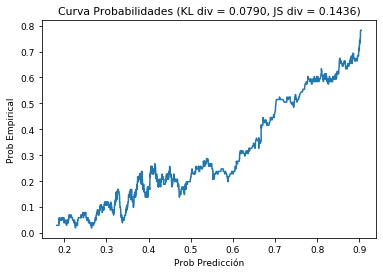

In [22]:
# probar data balanciado con transformación sqrt de montos y categorical separado.

#uso de random forest:
from sklearn.ensemble import RandomForestClassifier

#utilizaremos X e y de tren. 
bosque = RandomForestClassifier(n_estimators=20, min_impurity_decrease=0.0001, max_depth=7)
bosque.fit(X_entren_os_tr_pago, y_entren_os)

print('\nEntrenamiento')
custom_cost(bosque, X_entren_os_tr_pago, y_entren_os, True)
print('\nValidacion')
custom_cost(bosque, X_val_tr_pago, y_val, True)
print('\nProbabilidad de no pagar')
y_val_prob = bosque.predict_proba(X_val_tr_pago)[:,1] # Using probability of category +1
mostrarPQ(y_val, y_val_prob)

## Busqueda del optimo RandomRorest - con oversampling  


* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 11

Entrenamiento
Exactitud:     0.8112949871465296
Precisión:     0.8454680534918276
Exhaustividad: 0.7618359040274207
AUC:           0.8112949871465297
Costo por cliente: 0.2841152527849186

Validacion
Exactitud:     0.762
Precisión:     0.47878787878787876
Exhaustividad: 0.5817378497790869
AUC:           0.6982364388921286
Costo por cliente: 0.485

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 15

Entrenamiento
Exactitud:     0.8785614824335904
Precisión:     0.876324335835596
Exhaustividad: 0.8815338474721508
AUC:           0.8785614824335904
Costo por cliente: -0.08239610111396743

Validacion
Exactitud:     0.7686666666666667
Precisión:     0.4908424908424908
Exhaustividad: 0.5920471281296024
AUC:           0.7061915950859129
Costo por cliente: 0.4666666666666667

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0005
max_depth = 11

Entrenamiento
Exactitud:   

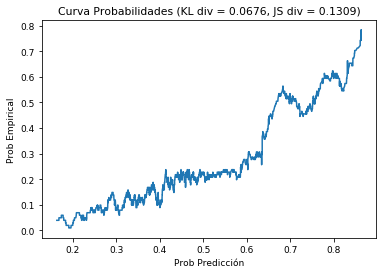

In [72]:
hist_os = buscarForest(X_entren_os, y_entren_os, X_val, y_val, 
             n_est_list=[10, 50], 
             min_imp_dec_list=[0.0001, 0.0005], 
             max_depth_list=[11, 15], printdetail=True)

## Busqueda del optimo RandomForest - con oversampling y raiz cuadrado de montos  


* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 11

Entrenamiento
Exactitud:     0.8086707369323051
Precisión:     0.8355749636098981
Exhaustividad: 0.7685839760068551
AUC:           0.808670736932305
Costo por cliente: 0.269869323050557

Validacion
Exactitud:     0.751
Precisión:     0.460093896713615
Exhaustividad: 0.5773195876288659
AUC:           0.689564576235803
Costo por cliente: 0.501

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 15

Entrenamiento
Exactitud:     0.8803556126820908
Precisión:     0.8785310734463276
Exhaustividad: 0.8827656383890317
AUC:           0.8803556126820908
Costo por cliente: -0.0872697086546701

Validacion
Exactitud:     0.7593333333333333
Precisión:     0.47374847374847373
Exhaustividad: 0.5714285714285714
AUC:           0.6928663753308303
Costo por cliente: 0.49933333333333335

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0005
max_depth = 11

Entrenamiento
Exactitud:     0

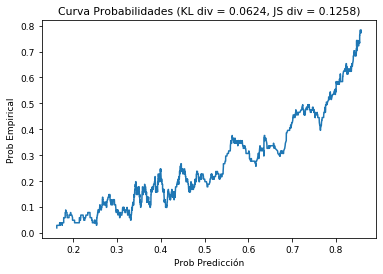

In [73]:
# Optimizar con datos originales. Podemos usar los otros datos tambien.
hist_os_tr = buscarForest(X_entren_os_tr, y_entren_os, X_val_tr, y_val, 
             n_est_list=[10, 50], 
             min_imp_dec_list=[0.0001, 0.0005], 
             max_depth_list=[11, 15], printdetail=True)


## Busqueda del optimo RandomForest - con oversampling y raiz cuadrado de montos  y categorias separadas  


* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 11

Entrenamiento
Exactitud:     0.8009318766066839
Precisión:     0.840380421613763
Exhaustividad: 0.742984147386461
AUC:           0.8009318766066839
Costo por cliente: 0.34160775492716366

Validacion
Exactitud:     0.7633333333333333
Precisión:     0.48125755743651755
Exhaustividad: 0.5861561119293078
AUC:           0.7006609943532796
Costo por cliente: 0.4786666666666667

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0001
max_depth = 15

Entrenamiento
Exactitud:     0.8681715938303342
Precisión:     0.8712133484529402
Exhaustividad: 0.8640745501285347
AUC:           0.8681715938303343
Costo por cliente: -0.02835796915167095

Validacion
Exactitud:     0.76
Precisión:     0.47503045066991473
Exhaustividad: 0.5743740795287187
AUC:           0.6943391293809039
Costo por cliente: 0.49533333333333335

* Parametros *
num_estimators = 10
min_impurity_decrease = 0.0005
max_depth = 11

Entrenamiento

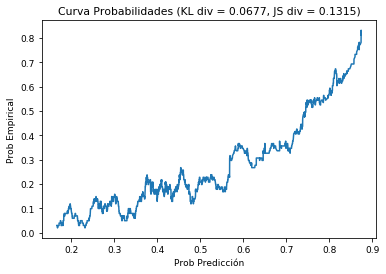

In [74]:
# Optimizar con datos originales. Podemos usar los otros datos tambien.
hist_os_tr_pago = buscarForest(X_entren_os_tr_pago, y_entren_os, X_val_tr_pago, y_val, 
             n_est_list=[10, 50], 
             min_imp_dec_list=[0.0001, 0.0005], 
             max_depth_list=[11, 15], printdetail=True)

## Juntar los muestreos  

In [23]:

hist = pd.DataFrame(hist_simple + hist_os + hist_os_tr + hist_os_tr_pago)
keys = ['simple']*8 
keys += ['over']*8
keys += ['over+sqrt']*8
keys += ['over+sqrt+pago']*8
len(keys), len(hist)
hist['Sampling'] = keys
hist.head()
hist = hist.rename(columns={0:'num_est', 1:'min_imp_decr', 2:'max_depth', 7:'cost', 
                     3:'accuracy', 4:'precision', 5:'recall', 6:'AUC'})

NameError: name 'hist_simple' is not defined

In [78]:
hist.to_csv ('RandomForestExperiments.csv', index = None, header=True)

## Test con mejor ajustes de validación  


Entrenamiento
Exactitud:     0.807959796122517
Precisión:     0.8383753794619492
Exhaustividad: 0.7630162435097413
AUC:           0.807959796122517
Costo por cliente: 0.2844995951031296

Test
Exactitud:     0.7733333333333333
Precisión:     0.467680608365019
Exhaustividad: 0.5866454689984102
AUC:           0.7047525109648314
Costo por cliente: 0.4503333333333333

Probabilidad de no pagar


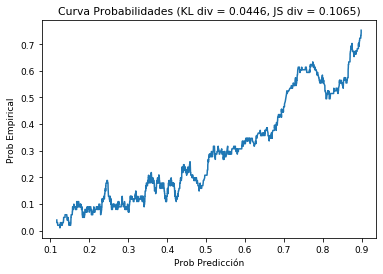

In [24]:
#utilizaremos X e y de tren. 
# Deberia usar combinado entren + val para train.
# Necesario agregar al preparacion del datos!
bosque = RandomForestClassifier(n_estimators=10, min_impurity_decrease=0.0001, max_depth=11)
bosque.fit(X_entrenval_os_tr, y_entrenval_os)

print('\nEntrenamiento')
custom_cost(bosque, X_entrenval_os_tr, y_entrenval_os, True)
print('\nTest')
custom_cost(bosque, X_test_tr, y_test, True)
print('\nProbabilidad de no pagar')
y_test_prob = bosque.predict_proba(X_test_tr)[:,1] # Using probability of category +1
mostrarPQ(y_test, y_test_prob)

### Corregido error de no revisar con min_imp_dcr = 0.0005  


Entrenamiento
Exactitud:     0.7204306197303864
Precisión:     0.7667608231970946
Exhaustividad: 0.6335921497642071
AUC:           0.7204306197303862
Costo por cliente: 0.6955890058590959

Test
Exactitud:     0.768
Precisión:     0.4591961023142509
Exhaustividad: 0.5993640699523053
AUC:           0.7060506558112434
Costo por cliente: 0.44233333333333336

Probabilidad de no pagar


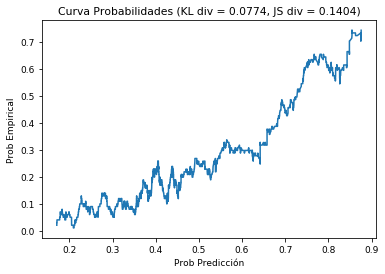

In [25]:
#utilizaremos X e y de tren. 
# Deberia usar combinado entren + val para train.
# Necesario agregar al preparacion del datos!
bosque = RandomForestClassifier(n_estimators=10, min_impurity_decrease=0.0005, max_depth=15)
bosque.fit(X_entrenval_os_tr_pago, y_entrenval_os)

print('\nEntrenamiento')
custom_cost(bosque, X_entrenval_os_tr_pago, y_entrenval_os, True)
print('\nTest')
custom_cost(bosque, X_test_tr_pago, y_test, True)
print('\nProbabilidad de no pagar')
y_test_prob = bosque.predict_proba(X_test_tr_pago)[:,1] # Using probability of category +1
mostrarPQ(y_test, y_test_prob)

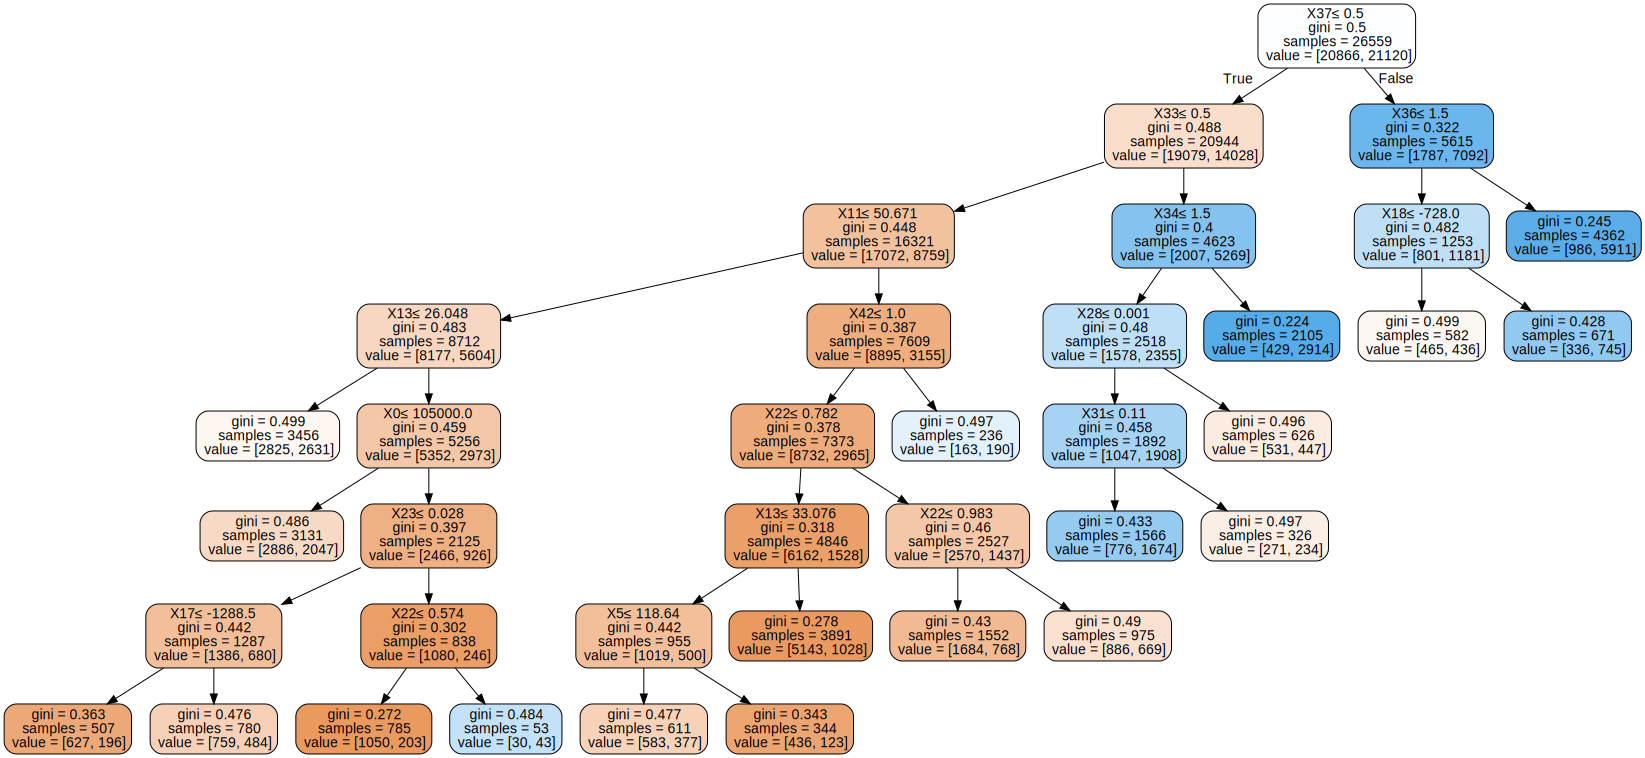

In [26]:
import sklearn.tree as tree
import graphviz 

# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

estimator = bosque.estimators_[5]
dot_data = tree.export_graphviz(estimator, out_file='samplerandomforest.dot')

dot_data = tree.export_graphviz(estimator, out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 